## PROBLEM STATEMENT
#### TECHNOLOGY: DATA SCIENCE
Students from different cities from the state of Maharashtra had applied for the Cloud
Counselage Internship Program. We have the dataset of consisting information of all the
students. Using this data we want to get more insights and draw out more meaningful
conclusions. Interns are expected to build a data visualization model and find the best data
segmentation model using the student’s dataset. Following are the tasks interns need to
perform :
1. Interns need to preprocess the data for missing values, unknown values, encoding
categorical values.
2. Create a data visualization model to build graphs from the dataset answering the
following questions:
a. The number of students applied to different technologies.
b. The number of students applied for Data Science who knew ‘’Python” and
who didn’t.
c. The different ways students learned about this program.
d. Students who are in the fourth year and have a CGPA greater than 8.0.
e. Students who applied for Digital Marketing with verbal and written
communication score greater than 8.
f. Year-wise and area of study wise classification of students.
g. City and college wise classification of students.
h. Plot the relationship between the CGPA and the target variable.
i. Plot the relationship between the Area of Interest and the target variable.
j. Plot the relationship between the year of study, major, and the target variable.
3. Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”.

Input
Path of the input dataset file
Output
For the data classification, In output print accuracy of the best model identified.
For the data visualization model, in output code need to create a pdf file of all the graphs
generated by the model.


In [1]:
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

## Data Pre-processing

In [2]:
data=pd.read_csv('DS_DATESET.CSV')
data.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [3]:
df=data
df.columns

Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')

In [4]:
df.isnull().sum()

First Name                                                       0
Last Name                                                        0
City                                                             0
State                                                            0
Zip Code                                                         0
DOB [DD/MM/YYYY]                                                 0
Age                                                              0
Gender                                                           0
Email Address                                                    0
Contact Number                                                   0
Emergency Contact Number                                         0
College name                                                     0
University Name                                                  0
Degree                                                           0
Major/Area of Study                                           

Hence, these 3 columns are full of NaN values:

(1)'Certifications/Achievement/ Research papers'
(2)'Link to updated Resume (Google/ One Drive link preferred)'
(3)'link to Linkedin profile'

As these columns have no data,we will drop these columns

In [5]:
df.drop(['Certifications/Achievement/ Research papers'
,'Link to updated Resume (Google/ One Drive link preferred)'
,'link to Linkedin profile'], axis = 1) 

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,6,10,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,Cloud Computing,Student,Yes,PHP,No,Yes,10,7,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,IoT,Student,Yes,C,No,No,8,6,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,Digital Marketing,Student,No,PHP,No,Yes,9,6,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Cloud Computing,Student,No,Python,No,Yes,8,6,Facebook,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Paulie,Wilden,Sangli,Maharashtra,416410,1/6/2000,19,Male,pwildenrn@sbwire.com,5067103396,...,Machine Learning,Student,Yes,JavaScript,Yes,Yes,9,9,Facebook,eligible
9996,Domini,Napton,Mumbai,Maharashtra,400059,20/07/1998,21,Female,dnaptonro@deviantart.com,9365868127,...,Cyber Security,Student,No,PHP,Yes,Yes,7,7,Friend,eligible
9997,Adoree,Westwick,Kolhapur,Maharashtra,416007,21/03/1998,22,Female,awestwickrp@example.com,7088063119,...,IoT,Student,Yes,C++,Yes,No,7,7,Newspaper,eligible
9998,Germain,Imlen,Sangli,Maharashtra,416415,29/01/2000,20,Female,gimlenrq@theatlantic.com,1662837014,...,Machine Learning,Student,No,JavaScript,Yes,Yes,7,6,Blog post,ineligible


In [6]:
print(len(df))

10000


This data contains data of 10000 students who have applied for the Internship Program of Cloud Counselage.

## Data Visualization Model

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid", context="notebook")

### a)The number of students applied to different technologies.


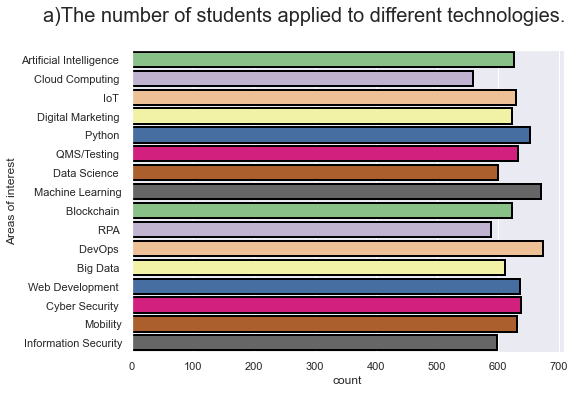

In [8]:
figa,ax=plt.subplots(figsize=(6,6))
plt.suptitle('a)The number of students applied to different technologies.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
sns.countplot(y='Areas of interest',data=df,color='cadetblue',edgecolor=(0,0,0),linewidth=2,palette='Accent')

### b)The number of students applied for Data Science who knew ‘’Python” and who didn’t.
 

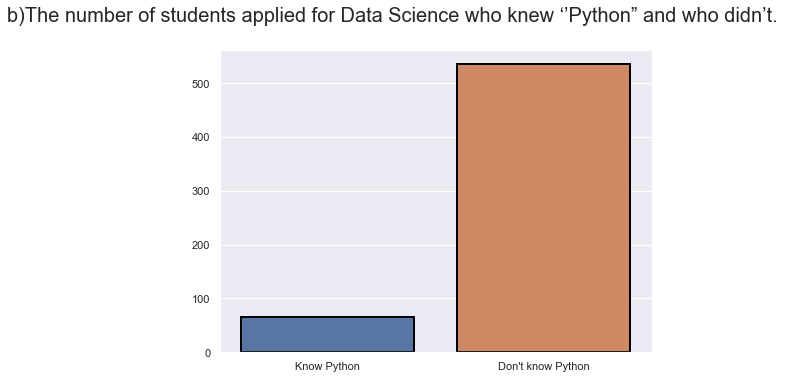

In [9]:
figb,ax=plt.subplots(figsize=(6,6))
plt.suptitle('b)The number of students applied for Data Science who knew ‘’Python” and who didn’t.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
d1=df[['Areas of interest','Programming Language Known other than Java (one major)']]
d1=d1[df['Areas of interest']=='Data Science ']
c1=0
c2=0
for i in d1['Programming Language Known other than Java (one major)']:
    if i=='Python':
        c1=c1+1
    else:
        c2=c2+1
l1=[c1,c2]
l2=['Know Python',"Don't know Python"]
sns.barplot(l2,l1,edgecolor=(0,0,0),linewidth=2)

### c)The different ways students learned about this program.

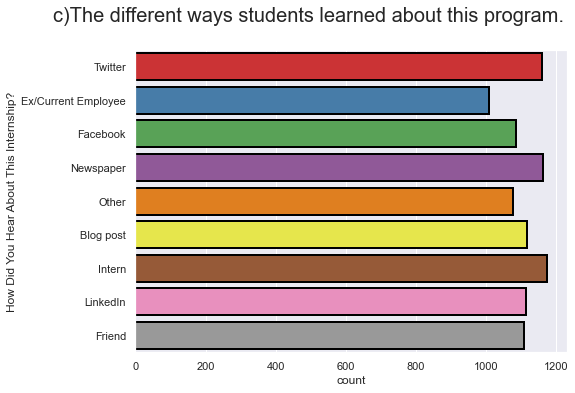

In [10]:
figc,ax=plt.subplots(figsize=(6,6))
plt.suptitle('c)The different ways students learned about this program.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
sns.countplot(y='How Did You Hear About This Internship?',data=df,color='cadetblue',edgecolor=(0,0,0),linewidth=2,palette='Set1')

### d)Students who are in the fourth year and have a CGPA greater than 8.0.


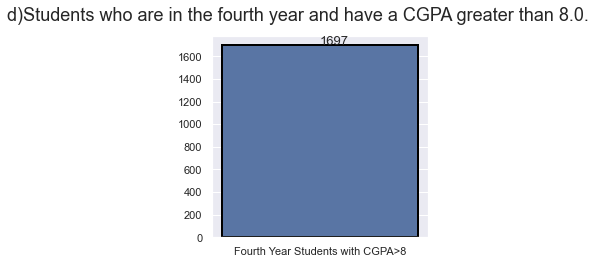

In [11]:
figd,ax=plt.subplots(figsize=(3,4))
plt.suptitle('d)Students who are in the fourth year and have a CGPA greater than 8.0.',size=18,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
d1=df[['Which-year are you studying in?','CGPA/ percentage']]
d1=d1[(d1['Which-year are you studying in?']=='Fourth-year')&(d1['CGPA/ percentage']>8)]
d1=d1[['CGPA/ percentage']]
d1.head()

l1=[]
l1.append(len(d1))
l2=['Fourth Year Students with CGPA>8']
sns.barplot(l2,l1,edgecolor=(0,0,0),linewidth=2)
for index, value in enumerate(l1):
    plt.text(index,value+5, str(value),fontsize=13)

### e)Students who applied for Digital Marketing with verbal and written communication score greater than 8.

In [40]:

d1=df[['Areas of interest','Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]']]
d1=d1[df['Areas of interest']=='Digital Marketing ']
d1=d1[(d1['Rate your written communication skills [1-10]']>8)&(d1['Rate your verbal communication skills [1-10]']>8)]
d1.head()

,Areas of interest,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10]
294,Digital Marketing,9,10
420,Digital Marketing,9,10
424,Digital Marketing,9,10
500,Digital Marketing,9,10
588,Digital Marketing,10,10


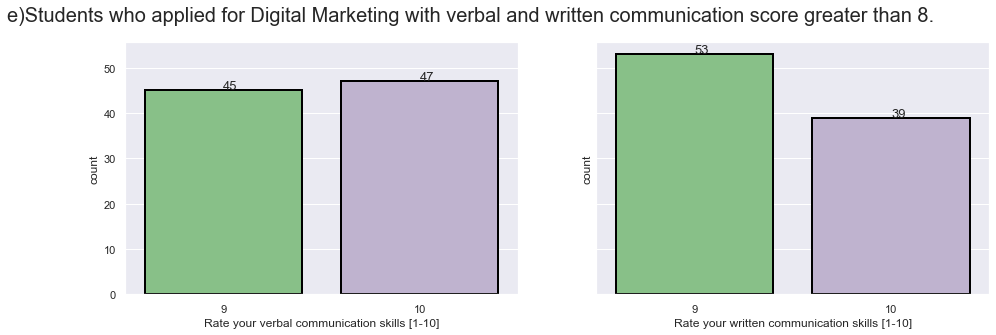

In [47]:
fige,(ax1,ax2)=plt.subplots(1,2,sharey='row')
plt.suptitle('e)Students who applied for Digital Marketing with verbal and written communication score greater than 8.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
fige.set_size_inches(12, 5)

sns.countplot(x='Rate your verbal communication skills [1-10]',data=d1,ax=ax1,edgecolor=(0,0,0),linewidth=2,palette='Accent')
sns.countplot(x='Rate your written communication skills [1-10]',data=d1,ax=ax2,edgecolor=(0,0,0),linewidth=2,palette='Accent')
ye1=d1['Rate your written communication skills [1-10]'].value_counts().tolist()
for index, value in enumerate(ye1):
    ax2.text(index,value+0.2, str(value),fontsize=13)
ye2=d1['Rate your verbal communication skills [1-10]'].value_counts().tolist()
ye2.reverse()
for index, value in enumerate(ye2):
    ax1.text(index,value+0.3, str(value),fontsize=13)


### f)Year-wise and area of study wise classification of students.

In [14]:
d=df[['Which-year are you studying in?','Major/Area of Study']]
d1=d[d['Which-year are you studying in?']=='First-year']
d2=d[d['Which-year are you studying in?']=='Second-year']
d3=d[d['Which-year are you studying in?']=='Third-year']
d4=d[d['Which-year are you studying in?']=='Fourth-year']
d4.head()

,Which-year are you studying in?,Major/Area of Study
1,Fourth-year,Electronics and Telecommunication
2,Fourth-year,Electrical Engineering
5,Fourth-year,Electrical Engineering
8,Fourth-year,Computer Engineering
9,Fourth-year,Electronics and Telecommunication


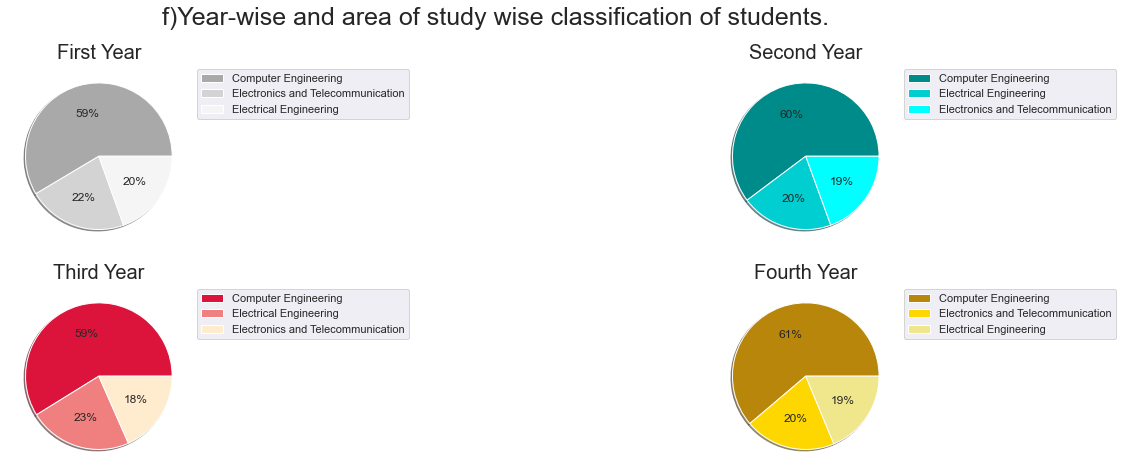

In [15]:
dc1=d1['Major/Area of Study'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
figf,ax= plt.subplots(2,2, subplot_kw=dict(aspect="equal"))
figf.set_size_inches(12,8)

plt.suptitle('f)Year-wise and area of study wise classification of students.',size=25,x=0.8,y=0.9)
ax[0,0].pie(l2, shadow=True, startangle=0,autopct='%1.0f%%',colors=['darkgray','lightgray','whitesmoke'])
ax[0,0].set_title('First Year',fontsize=20)
ax[0,0].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d2['Major/Area of Study'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[0,1].pie(l2, shadow=True, startangle=0,autopct='%1.0f%%',colors=['darkcyan','darkturquoise','aqua'''])
ax[0,1].set_title('Second Year',fontsize=20)
ax[0,1].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d3['Major/Area of Study'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[1,0].pie(l2,shadow=True, startangle=0,autopct='%1.0f%%',colors=['crimson','lightcoral','blanchedalmond'])
ax[1,0].set_title('Third Year',fontsize=20)
ax[1,0].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d4['Major/Area of Study'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[1,1].pie(l2, shadow=True, startangle=0,autopct='%1.0f%%',colors=['darkgoldenrod','gold','khaki'])
ax[1,1].set_title('Fourth Year',fontsize=20)
ax[1,1].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

plt.subplots_adjust(left=0.0, bottom=0.1, right=1.5,top=0.8)
plt.show()


### g)City and college wise classification of students.

In [16]:
df['City'].value_counts()

Solapur       1710
NaviMumbai    1678
Sangli        1670
Mumbai        1648
Kolhapur      1647
Pune          1647
Name: City, dtype: int64

In [17]:
d=df[['City','College name']]
d1=d[d['City']=='Solapur']
d2=d[d['City']=='NaviMumbai']
d3=d[d['City']=='Sangli']
d4=d[d['City']=='Mumbai']
d5=d[d['City']=='Kolhapur']
d6=d[d['City']=='Pune']
d1.head()

,City,College name
3,Solapur,Brahmdevdada Mane Institute of Technology
6,Solapur,Skn Sinhgad College of Engineering
13,Solapur,Brahmdevdada Mane Institute of Technology
15,Solapur,Brahmdevdada Mane Institute of Technology
18,Solapur,Brahmdevdada Mane Institute of Technology


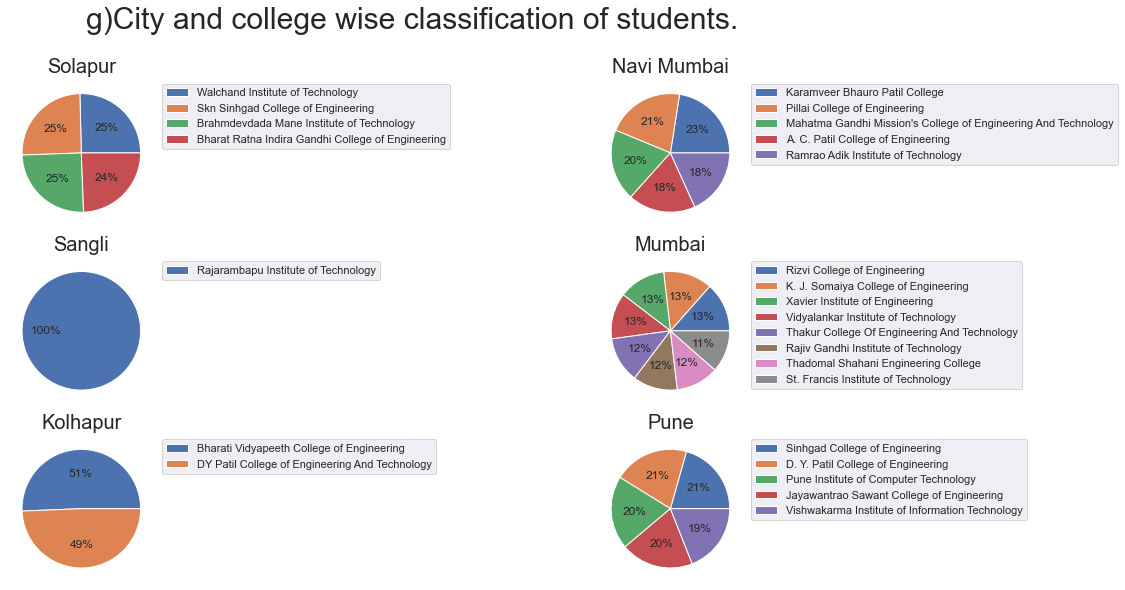

In [18]:
theme = plt.get_cmap('copper')
dc1=d1['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
figg, ax = plt.subplots(3,2,figsize=(10,10))

plt.suptitle('g)City and college wise classification of students.',size=30,x=0.8,y=0.9)
ax[0,0].pie(l2, shadow=False, startangle=0,autopct='%1.0f%%')
ax[0,0].set_title('Solapur',fontsize=20)
ax[0,0].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))
dc1=d2['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[0,1].pie(l2, shadow=False, startangle=0,autopct='%1.0f%%')
ax[0,1].set_title('Navi Mumbai',fontsize=20)
ax[0,1].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d3['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[1,0].pie(l2, shadow=False, startangle=0,autopct='%1.0f%%')
ax[1,0].set_title('Sangli',fontsize=20)
ax[1,0].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d4['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[1,1].pie(l2,  shadow=False, startangle=0,autopct='%1.0f%%')
ax[1,1].set_title('Mumbai',fontsize=20)
ax[1,1].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d5['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[2,0].pie(l2, shadow=False, startangle=0,autopct='%1.0f%%')
ax[2,0].set_title('Kolhapur',fontsize=20)
ax[2,0].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

dc1=d6['College name'].value_counts().to_dict()
l1=[]
l2=[]
for k,v in dc1.items():
    l1.append(k)
    l2.append(v)   
ax[2,1].pie(l2,  shadow=False, startangle=0,autopct='%1.0f%%')
ax[2,1].set_title('Pune',fontsize=20)
ax[2,1].legend(l1,loc='best',bbox_to_anchor=(1.005,1.005))

plt.subplots_adjust(left=0.0, bottom=0.1, right=1.5,top=0.8)
plt.show()



### h)Plot the relationship between the CGPA and the target variable.

In [19]:
d1=df[['CGPA/ percentage','Label','Which-year are you studying in?']]
d1.head()

,CGPA/ percentage,Label,Which-year are you studying in?
0,7.26,ineligible,Second-year
1,8.73,eligible,Fourth-year
2,8.61,ineligible,Fourth-year
3,7.96,ineligible,Second-year
4,7.07,ineligible,First-year


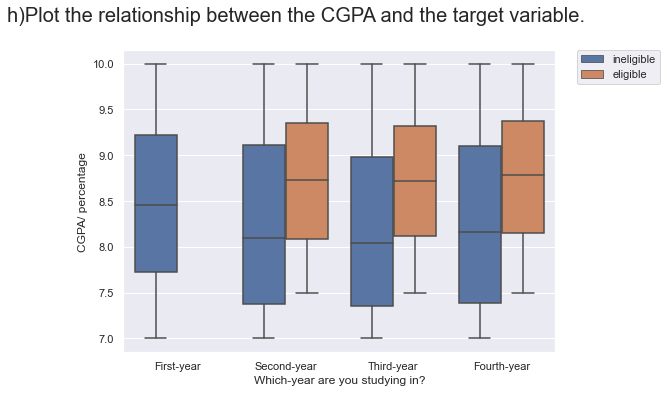

In [20]:
figh,ax=plt.subplots(figsize=(6,6))
plt.suptitle('h)Plot the relationship between the CGPA and the target variable.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
g=sns.boxplot(x='Which-year are you studying in?',y ='CGPA/ percentage', data = d1, hue ='Label',order=['First-year','Second-year','Third-year','Fourth-year'])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### i)Plot the relationship between the Area of Interest and the target variable.

In [21]:

d1=df[['Areas of interest','Label','Which-year are you studying in?']]
d1.head()

,Areas of interest,Label,Which-year are you studying in?
0,Artificial Intelligence,ineligible,Second-year
1,Cloud Computing,eligible,Fourth-year
2,IoT,ineligible,Fourth-year
3,Digital Marketing,ineligible,Second-year
4,Cloud Computing,ineligible,First-year


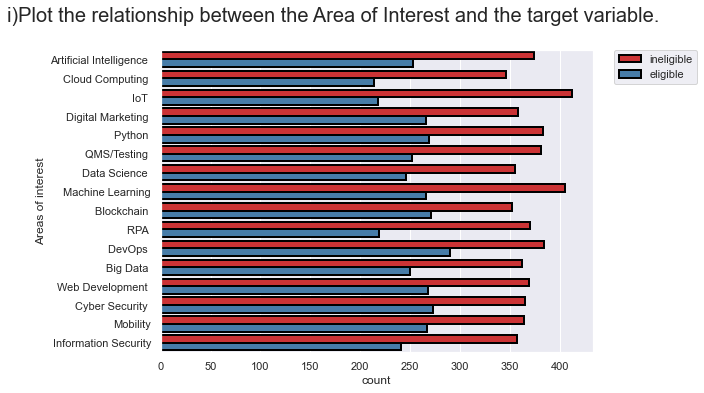

In [22]:
figi,ax=plt.subplots(figsize=(6,6))
plt.suptitle('i)Plot the relationship between the Area of Interest and the target variable.',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
g=sns.countplot(y='Areas of interest',data=d1,hue='Label',edgecolor=(0,0,0),linewidth=2,palette='Set1')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### j)Plot the relationship between the year of study, major, and the target variable

In [23]:

d=df[['Major/Area of Study','Label','Which-year are you studying in?']]
d1=d[d['Which-year are you studying in?']=='First-year']
d2=d[d['Which-year are you studying in?']=='Second-year']
d3=d[d['Which-year are you studying in?']=='Third-year']
d4=d[d['Which-year are you studying in?']=='Fourth-year']
d4.head()

,Major/Area of Study,Label,Which-year are you studying in?
1,Electronics and Telecommunication,eligible,Fourth-year
2,Electrical Engineering,ineligible,Fourth-year
5,Electrical Engineering,ineligible,Fourth-year
8,Computer Engineering,eligible,Fourth-year
9,Electronics and Telecommunication,ineligible,Fourth-year


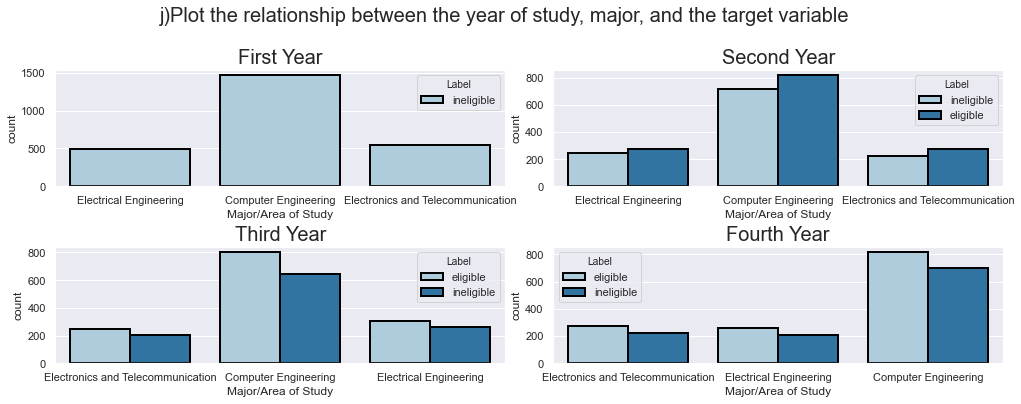

In [24]:

figj,ax=plt.subplots(2,2)
figj.set_size_inches(14,5)
plt.suptitle('j)Plot the relationship between the year of study, major, and the target variable',size=20,x=0.5,y=1.1)
plt.subplots_adjust(left=0, bottom=0.2, right=1.5,top=1)

sns.countplot(x='Major/Area of Study',data=d1,hue='Label',ax=ax[0,0],edgecolor=(0,0,0),linewidth=2,palette='Paired')
ax[0,0].set_title('First Year',fontsize=20)
sns.countplot(x='Major/Area of Study',data=d2,hue='Label',ax=ax[0,1],edgecolor=(0,0,0),linewidth=2,palette='Paired')
ax[0,1].set_title('Second Year',fontsize=20)
sns.countplot(x='Major/Area of Study',data=d3,hue='Label',ax=ax[1,0],edgecolor=(0,0,0),linewidth=2,palette='Paired')
ax[1,0].set_title('Third Year',fontsize=20)
sns.countplot(x='Major/Area of Study',data=d4,hue='Label',ax=ax[1,1],edgecolor=(0,0,0),linewidth=2,palette='Paired')
ax[1,1].set_title('Fourth Year',fontsize=20)
figj.tight_layout(pad=0.5)

In [25]:
with PdfPages('Mvisualization-output.pdf') as pdf:
    pdf.savefig(figa,bbox_inches='tight')
    pdf.savefig(figb,bbox_inches='tight')
    pdf.savefig(figc,bbox_inches='tight')
    pdf.savefig(figd,bbox_inches='tight')
    pdf.savefig(fige,bbox_inches='tight')
    pdf.savefig(figf,bbox_inches='tight')
    pdf.savefig(figg,bbox_inches='tight')
    pdf.savefig(figh,bbox_inches='tight')
    pdf.savefig(figi,bbox_inches='tight')
    pdf.savefig(figj,bbox_inches='tight')

## Binary Classification

### Encoding of categorical values

In [26]:
features=['Gender','Major/Area of Study','Which-year are you studying in?','CGPA/ percentage',
          'Have you worked core Java',
       'Have you worked on MySQL or Oracle database',
      'Have you studied OOP Concepts',
      'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]']
x=df[features]

y=pd.get_dummies(df['Label']).drop(['ineligible'],axis=1)
y=np.ravel(y)

encode={"Gender": {'Male': 0, 'Female': 1 },
"Which-year are you studying in?": {'First-year':1,'Second-year':2,'Third-year':3,'Fourth-year':4},
'Have you worked core Java':{'Yes':1,'No':0},
'Have you worked on MySQL or Oracle database':{'Yes':1,'No':0},
'Have you studied OOP Concepts':{'Yes':1,'No':0},
'Major/Area of Study':{'Computer Engineering':1,'Electrical Engineering':2,'Electronics and Telecommunication':3}}
x.replace(encode, inplace=True)


c:\users\lalita\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [27]:
x.head()

,Gender,Major/Area of Study,Which-year are you studying in?,CGPA/ percentage,Have you worked core Java,Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10]
0,0,2,2,7.26,1,1,0,6,10
1,1,3,4,8.73,1,0,1,10,7
2,0,2,4,8.61,1,0,0,8,6
3,1,1,2,7.96,0,0,1,9,6
4,1,2,1,7.07,0,0,1,8,6


#### Importing necessary libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.34)
def MSE(predictions, labels):
    differences = [(int(x)-int(y))**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)


#### Testing of model on different classifiers:

In [30]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)
sorted(scores.keys())
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR.fit(X_train,y_train)
predictions = LR.predict(X_train)
lrms=MSE(predictions,y_train)

In [31]:
SVM = SVC(probability = True)


scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_train)
smse=MSE(predictions,y_train)

In [32]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA.fit(X_train,y_train)
predictions = LDA.predict(X_train)
lmse=MSE(predictions,y_train)

In [33]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA.fit(X_train,y_train)
predictions = QDA.predict(X_train)
qmse=MSE(predictions,y_train)


In [34]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_train)
kmse=MSE(predictions,y_train)

In [35]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes.fit(X_train,y_train)
predictions = bayes.predict(X_train)
bmse=MSE(predictions,y_train)

In [36]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy'    : [LR_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, SVM_precision, LDA_precision, QDA_precision,  KNN_precision, bayes_precision],
    'F1_score'    : [LR_f1, SVM_f1, LDA_f1, QDA_f1,  KNN_f1, bayes_f1],
    'MSE'         : [lrms, smse, lmse, qmse,  kmse, bmse]
    }, columns = ['Model','Accuracy', 'Precision','F1_score','MSE'])
models_initial.sort_values(by='F1_score', ascending=False)

,Model,Accuracy,Precision,F1_score,MSE
4,K-Nearest Neighbors,0.958024,0.954807,0.958128,0.021821
1,Support Vector Machine,0.916807,0.918970,0.916260,0.082285
5,Bayes,0.867707,0.887354,0.863775,0.131990
3,Quadratic Discriminant Analysis,0.853006,0.862127,0.850012,0.143355
2,Linear Discriminant Analysis,0.772842,0.766692,0.771328,0.226246
0,Logistic Regression,0.772843,0.766956,0.771109,0.227004


In [37]:
results=[]
for i in models_initial['F1_score']:
    results.append(i)
results

[0.7711091367760152,
 0.9162602582161947,
 0.7713282898362317,
 0.8500116291368206,
 0.9581277446682236,
 0.8637754557911881]

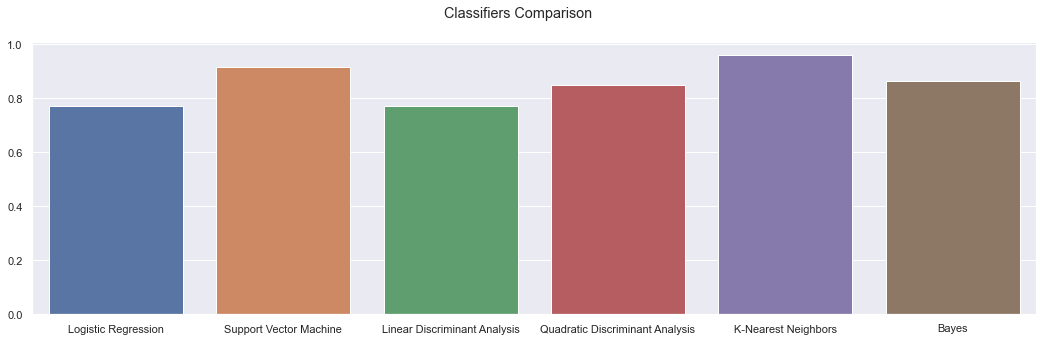

In [38]:
names=models_initial['Model'].to_list()
fig = plt.figure()
fig.set_size_inches(18,5)
fig.suptitle('Classifiers Comparison')
ax = fig.add_subplot(111)
sns.barplot(x=names,y=results)
ax.set_xticklabels(names)
plt.show()

### Hence,K-nearest Neighbors is considered as the best binary classifier.